<div style="text-align: center;">
<br>
<br>
<h1>Evaluating Machine Learning Classifiers for Predicting Credit Card Client Defaults</h1>
<br>
<br>
<br>
Luis Lopez,
Daniel Arday,
Steve Amancha       
<br>
<br>
<br>
<br>
</div>

## Introduction

The Default of Credit Card Clients dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients) comprises anonymized data on credit card holders from Taiwan. This dataset provides various attributes related to the demographic, financial, and transactional behavior of the clients, collected to analyze and predict default risk.

## Objective

**Our primary goal is to predict if credit card clients will default on their payment next month. Specifically, we aim to determine the factors that influence whether a client will default and to build predictive models for future clients with similar features. To achieve this, we plan to develop and compare the effectiveness of three different machine learning models, ultimately selecting the one that best predicts the default risk.**

## Data Description & Attribute Information

The Default of Credit Card Clients dataset includes the following attributes:

1. **LIMIT_BAL**: The amount of the given credit (NT dollar), including both the individual consumer credit and their family (supplementary) credit.
2. **SEX**: Gender of the client (1 = male, 2 = female).
3. **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others).
4. **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
5. **AGE**: Age of the client (years).
6. **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
7. **PAY_2**: Repayment status in August 2005 (scale same as above).
8. **PAY_3**: Repayment status in July 2005 (scale same as above).
9. **PAY_4**: Repayment status in June 2005 (scale same as above).
10. **PAY_5**: Repayment status in May 2005 (scale same as above).
11. **PAY_6**: Repayment status in April 2005 (scale same as above).
12. **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollar).
13. **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollar).
14. **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollar).
15. **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollar).
16. **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollar).
17. **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollar).
18. **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollar).
19. **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollar).
20. **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollar).
21. **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollar).
22. **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollar).
23. **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollar).
24. **default.payment.next.month**: Default payment (1 = yes, 0 = no).

## Exploratory Data Analysis (EDA)

The notebook starts with loading the dataset and performing an initial inspection, including displaying the first few rows of data and identifying binary columns to check imbalances.
- Descriptive Statistics: Summary statistics are calculated to understand the distribution and central tendencies and spread of the features.
- Missing Values: None

Visualization:
- Target Variable Distribution: The distribution of the target variable (default payment next month) is visualized using a count plot to understand the balance of the classes.
- Correlation Matrix: A correlation matrix heatmap is plotted to identify relationships between features and the target variable.
- Scatter Plots: Scatter plots of bill amounts and payment amounts over time are created to visualize patterns and relationships between these features and the target variable.
- Box Plots: Box plots are used to visualize the distribution of credit limits by education level and marital status, segmented by default status. This helps in identifying potential      differences in default rates across different demographic groups.
- Outlier Analysis: Outlier treatment is applied to handle extreme values that could skew the analysis and model performance.

## Feature Engineering

- Handling Outliers: A function is defined to identify and remove outliers based on a specified threshold (mean ± 3 standard deviations). This step is crucial to ensure that the model is not adversely affected by extreme values. Dimensionality reduction approaches will also be evaluated to confimr if it will improve the overall performance of the model.
- Standardization: The dataset consist of features that contain short ranges and long ranges that can potentially affect the performance of the model, we will attempt to confirm this difference by running models with model scaled features and non-scaled features as well.
- Imbalance: The target class has a large imbalance. An approach to address this issue is to using SMOTE incase our model does not learn with new data during testing.


## Justification

- The process of understanding the data, visualizing key relationships, handling data quality issues such as outliers, and preparing the data for modeling are key components to buiding any predictive model. By exploring the dataset thoroughly and visualizing different aspects of the data, the analysis can uncover important patterns and relationships that will inform the modeling process. Handling outliers ensures that the model is robust as well as properly splitting and training the data, along with it's corresponding hyperparameter tuning, class imbalnce and standardization will be fundamental for the perfromance of our model.

### Loading libraries and understanding the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score,recall_score,precision_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import lightgbm as lgb
from imblearn.over_sampling import SMOTE



df = pd.read_csv('default of credit card clients.csv', header=1, index_col=0)
pd.set_option('display.max_columns', None)
display(df.head(10))


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [3]:
# show the columns data types
print(df.dtypes)

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [43]:
# Searching for Binary columns
for i in df.columns:
    if df[i].value_counts().shape[0] <= 2:
        print(f'"{i}" is a binary column.')

"SEX" is a binary column.
"default payment next month" is a binary column.


In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isnull().sum().sum()

0

# Exploratory Data Analysis (EDA)

### Default Payments (Target Variable)

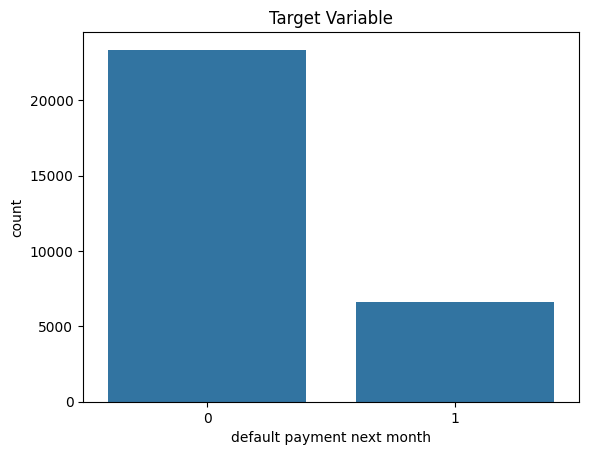

In [7]:
sns.countplot(data = df , x ='default payment next month')
plt.title('Target Variable')
plt.show();

#### Insights on Default Payments

`default.payment.next.month` shows a significant imbalance. The majority of clients (~ 23,000) did not default, whereas a smaller portion (~ 6,000) did default. Therefore we plan to addressing class imbalance in our predictive models to avoid biased predictions and ensure accurate risk assessment.

### Heat Map

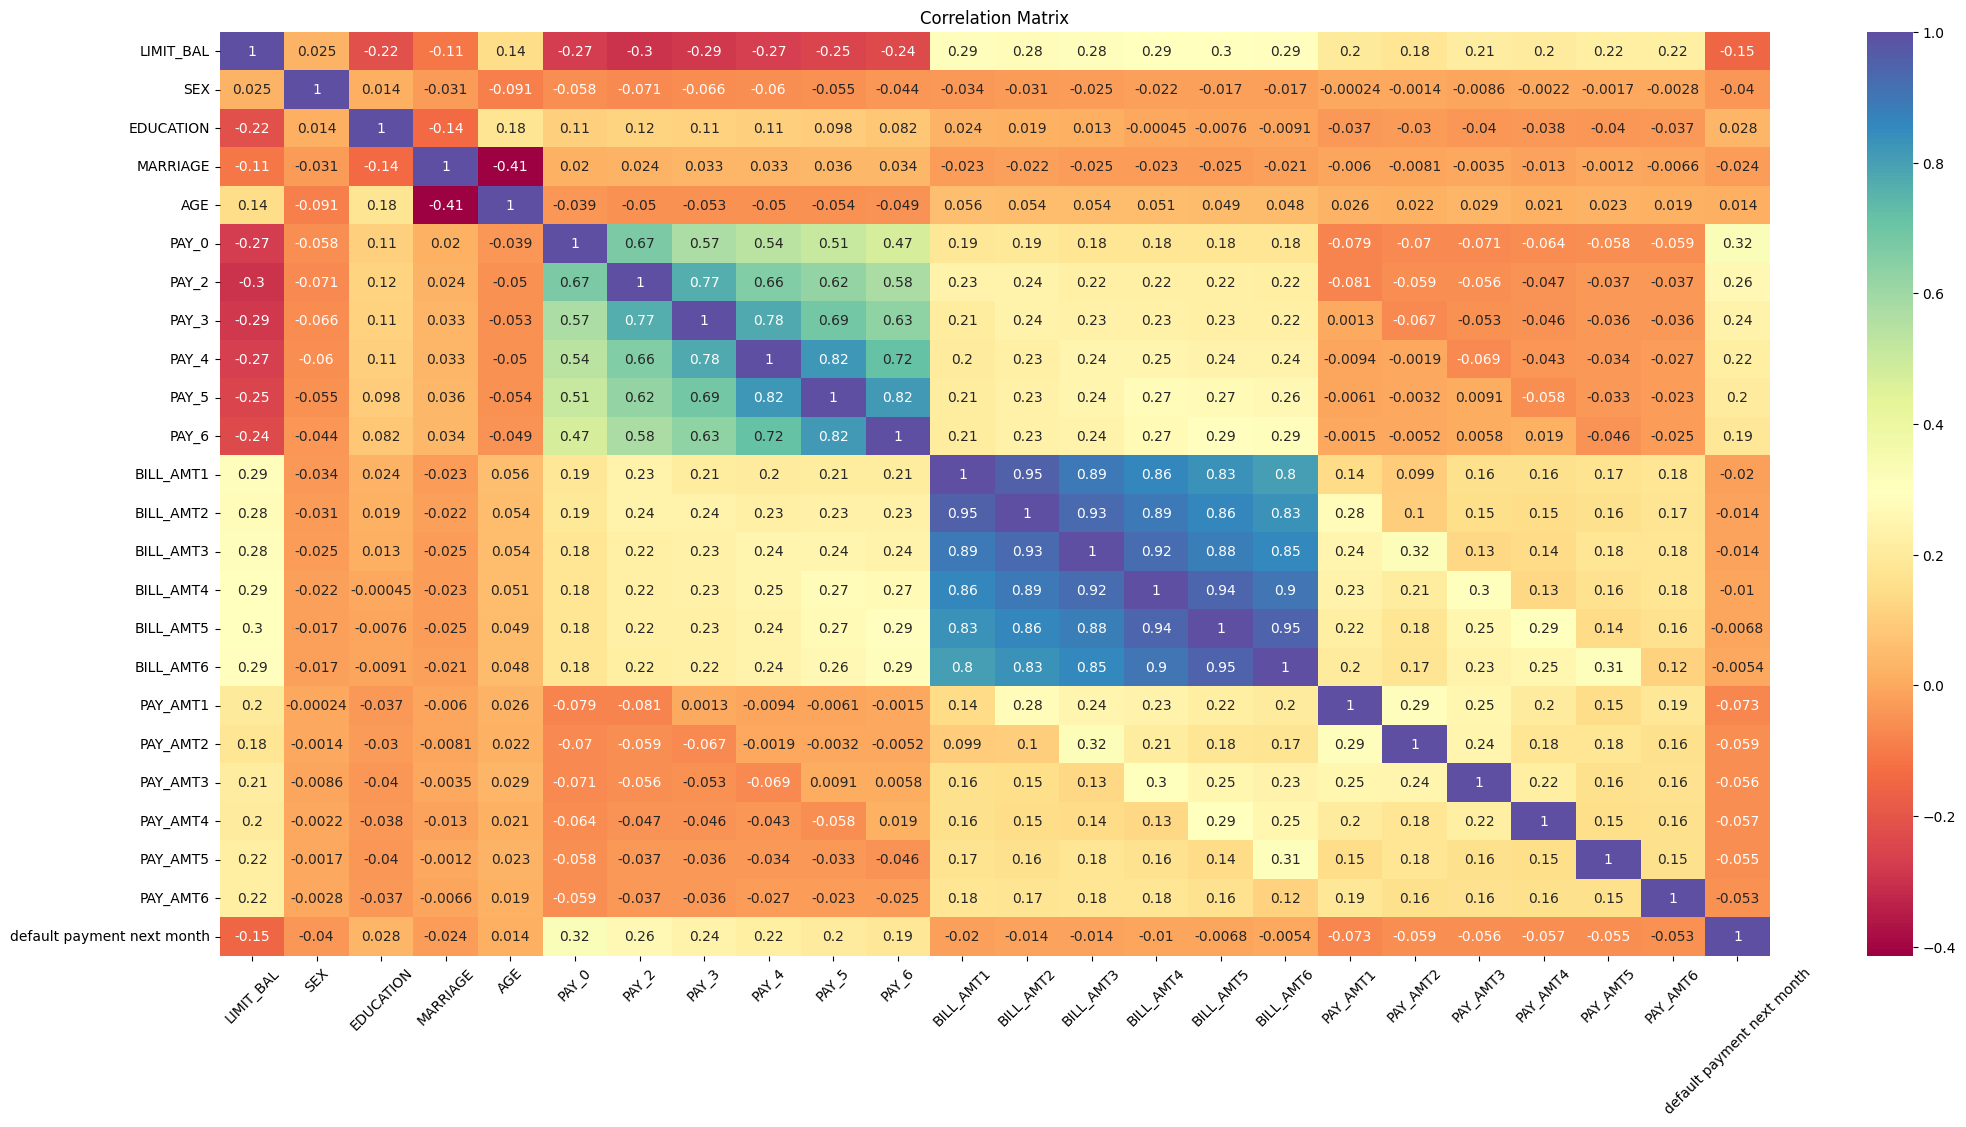

In [8]:
corr_mat = df.corr()
plt.figure(figsize = (25,12))
sns.heatmap(corr_mat, cmap='Spectral', annot= True)
plt.title('Correlation Matrix')
plt.xticks(rotation = 45)
plt.show();

#### Insights from Heat Map

1. **High Correlations Among Repayment Statuses**: The repayment status variables (`PAY_0` to `PAY_6`) show strong positive correlations with each other, indicating that clients who miss payments tend to miss multiple payments consecutively.

2. **Bill Amounts Correlation**: The bill statement amounts (`BILL_AMT1` to `BILL_AMT6`) are highly correlated with each other, suggesting that clients' spending patterns remain consistent across months.

3. **Default Payment Correlation**: The target variable, `default.payment.next.month`, has moderate positive correlations with repayment statuses, especially `PAY_0` (0.32), implying that recent repayment behavior is a significant predictor of default.

4. **Credit Limit and Default**: There is a negative correlation between the credit limit (`LIMIT_BAL`) and default payment next month (-0.15), indicating that clients with higher credit limits are less likely to default.

5. **Demographic Features**: Demographic features like `SEX`, `EDUCATION`, `MARRIAGE`, and `AGE` show relatively weak correlations with default payment, suggesting these attributes alone are less predictive of default risk compared to financial and repayment behaviors.

### Scatterplots

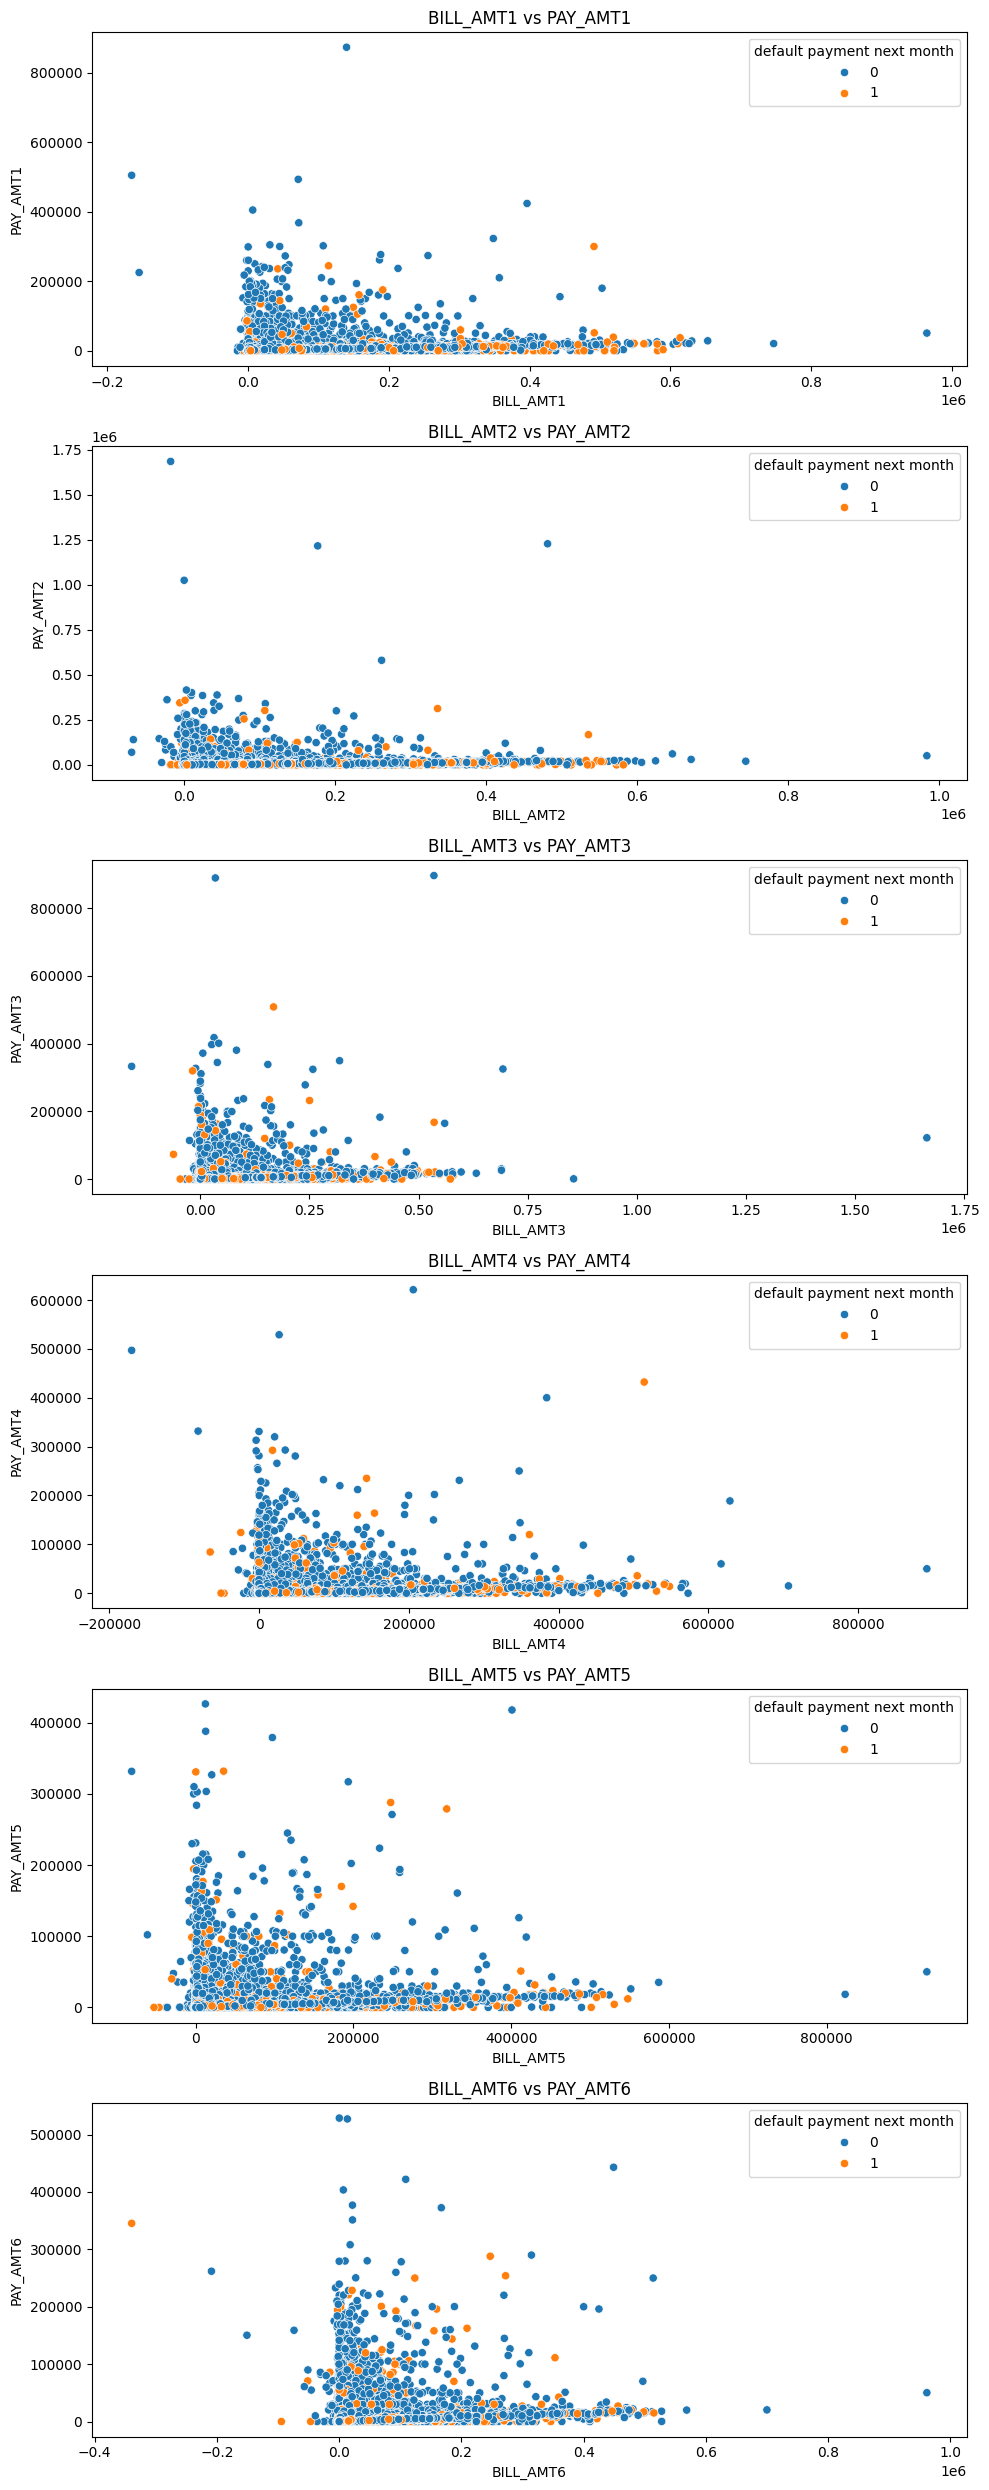

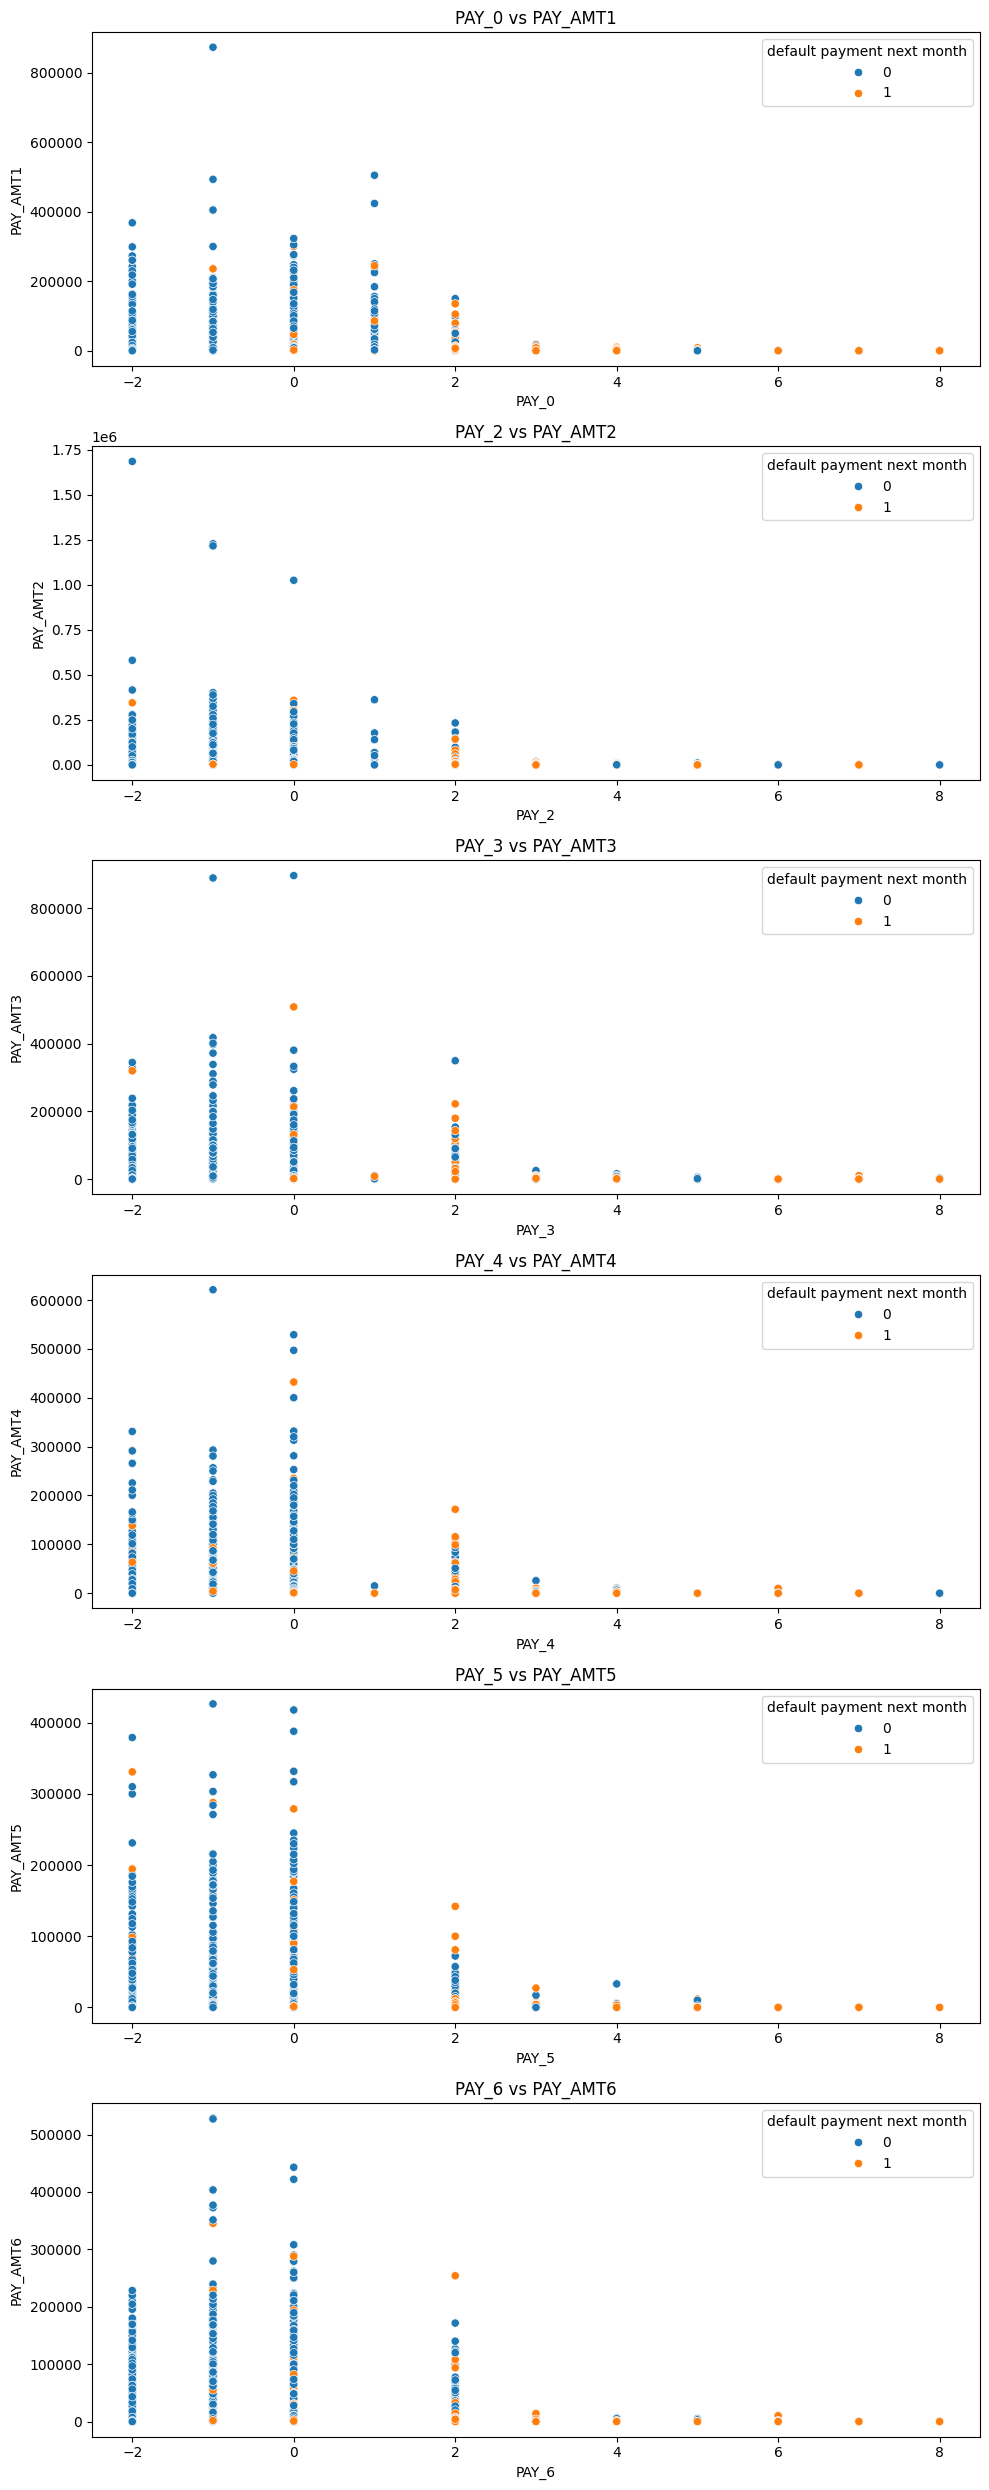

In [9]:
bill_amount = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bill_payment = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
default = []
plt.figure(figsize=(10, 25))

for i, (amt, bill_pay) in enumerate(zip(bill_amount, bill_payment)):
    plt.subplot(6, 1, i + 1)
    sns.scatterplot(data=df, x=amt, y=bill_pay, hue='default payment next month')
    plt.title(f'{amt} vs {bill_pay}')
    plt.xlabel(amt)
    plt.ylabel(bill_pay)

plt.tight_layout()
plt.show();

plt.figure(figsize=(10, 25))

for i, (payment, bill_pay) in enumerate(zip(pay, bill_payment)):
    plt.subplot(6, 1, i + 1)
    sns.scatterplot(data=df, x=payment, y=bill_pay, hue='default payment next month')
    plt.title(f'{payment} vs {bill_pay}')
    plt.xlabel(payment)
    plt.ylabel(bill_pay)

plt.tight_layout()
plt.show();

Clear patter on payments is noticeable  after the 2nd missed payment, the chances of defaulting the next increases

#### Insights from BILL_AMT vs. PAY_AMT

1. **Bill and Payment Amounts**: Higher bill amounts generally correspond to higher payment amounts, indicating that clients tend to pay more when their bills are higher.

2. **Default Patterns**: Defaulters (orange) and non-defaulters (blue) are intermixed across all bill and payment amounts. This suggests that bill and payment amounts alone aren't strong indicators of default risk, as defaulters do not show a distinct pattern.

#### Insights from PAY_X vs. PAY_AMTX

1. **Repayment Status and Payment Amounts**: Clients with timely repayments (lower PAY values) generally have lower and more consistent payment amounts. As the repayment status worsens (higher PAY values), the variability in payment amounts increases.

2. **Default Patterns**: There isn't a clear separation between defaulters and non-defaulters based on repayment status and payment amounts. However, after the second missed payment, the likelihood of defaulting the next month appears to increase, indicating a need for multifaceted analysis to predict defaults accurately.

Text(0.5, 1.0, 'Limit balance vs Age')

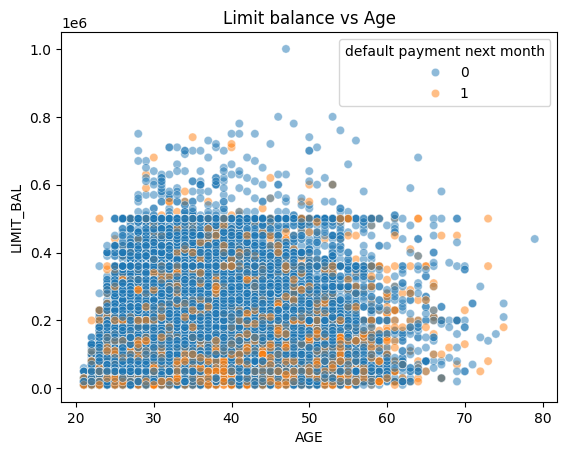

In [10]:
sns.scatterplot(data= df, x = 'AGE', y = 'LIMIT_BAL', hue= 'default payment next month', alpha = .5)
plt.title('Limit balance vs Age')

#### Insights from Limit Balance vs Age


1. **Credit Limits and Age**: Credit limits are broadly distributed across all age groups, with most clients having limits below 500,000 NT dollars.
   
2. **Default Patterns**: Defaulters and non-defaulters are intermixed across all age groups and credit limits, indicating no clear pattern. However, there is a slight tendency for defaulters to cluster below 200,000 NT dollars.


### Boxplots

In [11]:
#shared palette across all plots
palette = "Spectral" ##['red', 'blue','green','yellow', 'pink', 'coral', 'purple']

Text(0.5, 1.0, 'Defaulted Balances by Education')

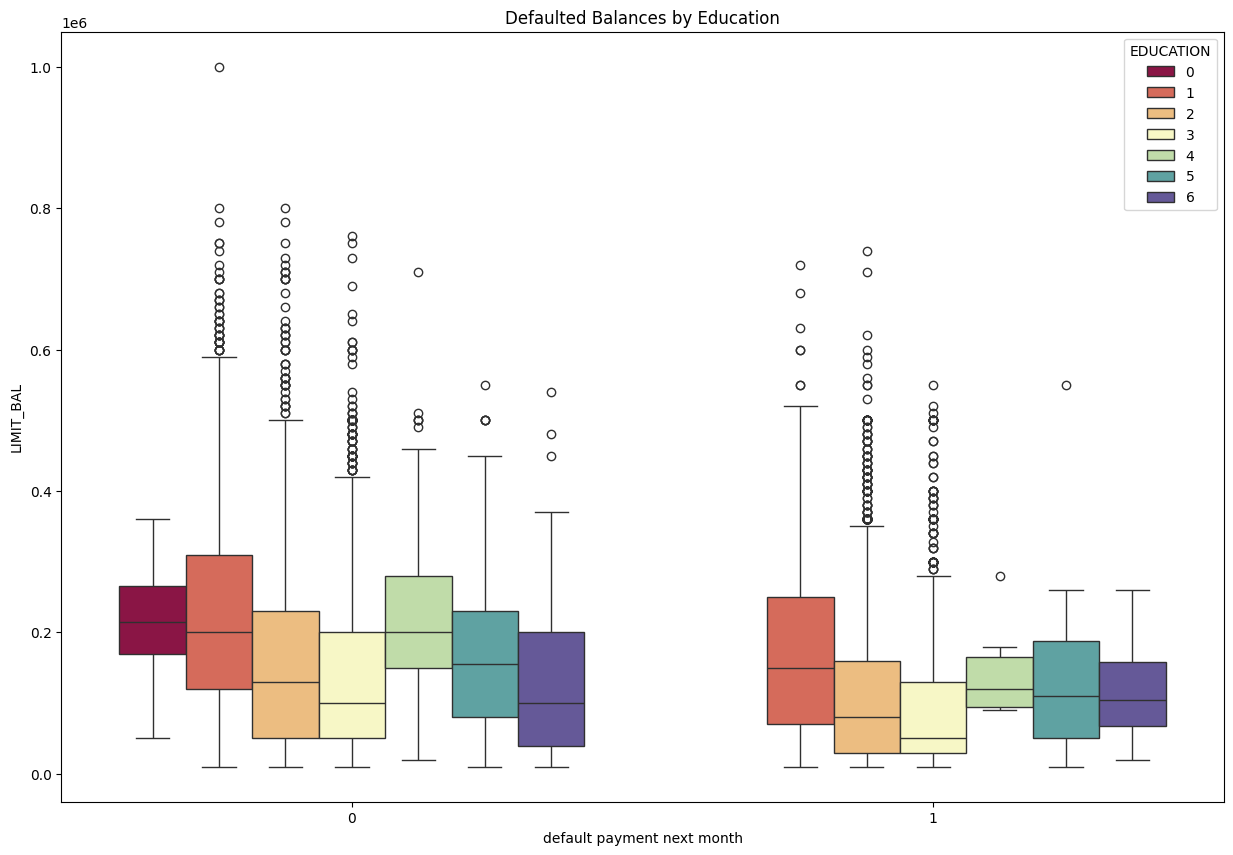

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df, x = 'default payment next month', y = 'LIMIT_BAL', hue='EDUCATION', palette = palette )
plt.title('Defaulted Balances by Education')

1 = Graduate school, 2 = University, 3 = High School, 4 = Other. We can probably combine 0, 5 and 6 into 4(other)

#### Insights on Defaulted Balances by Education

1. **Credit Limit Distribution**: The credit limits (`LIMIT_BAL`) are widely distributed across different education levels, with the median credit limit varying slightly by education category. Higher education levels (represented by different colors) do not show a clear trend in median credit limits.
   
2. **Default Patterns**: Both defaulters and non-defaulters show a similar spread of credit limits across education levels. There is no distinct pattern indicating that education level alone significantly influences the likelihood of default.

Text(0.5, 1.0, 'Defbaulted Balances by Marital Status')

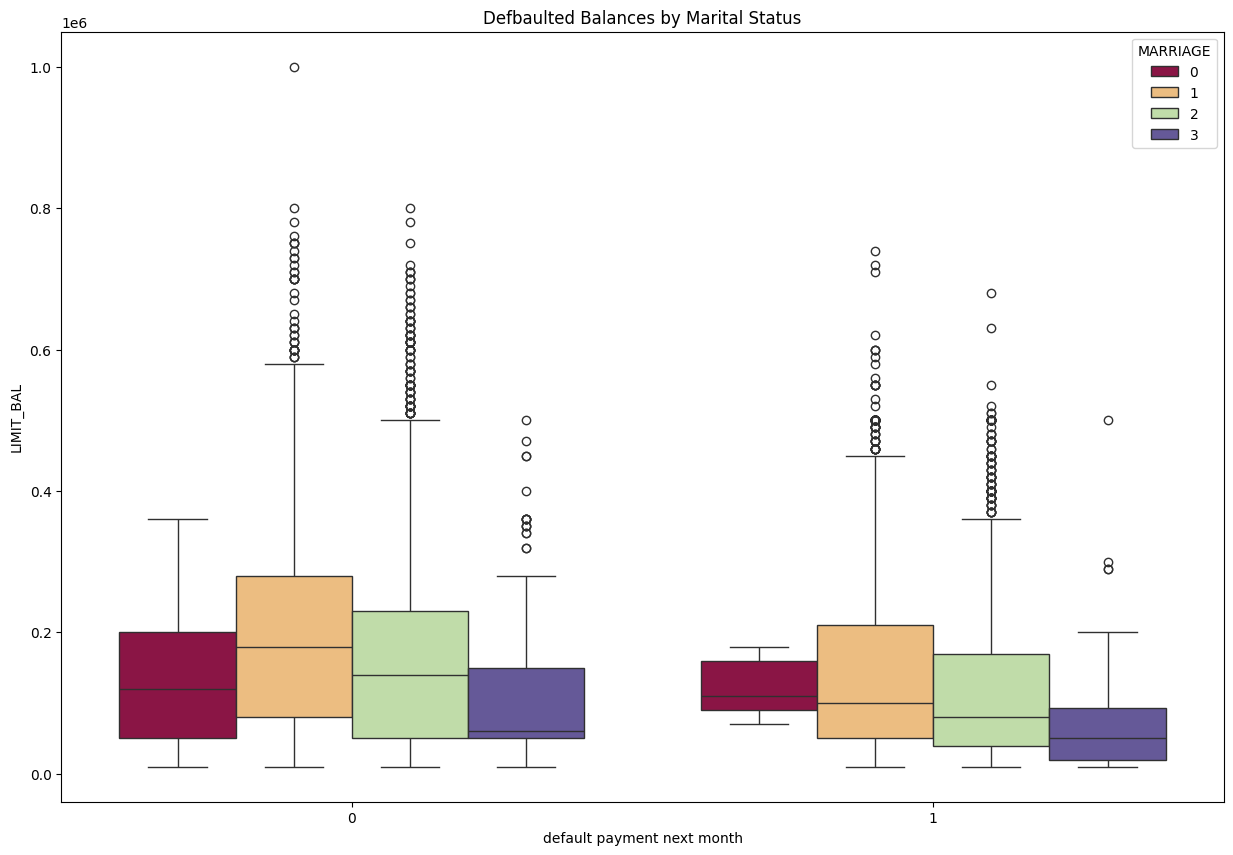

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df, x = 'default payment next month', y = 'LIMIT_BAL', hue='MARRIAGE', palette = palette)
plt.title('Defbaulted Balances by Marital Status')

X4: Marital status (1 = married; 2 = single; 3 = others).


#### Insights on Defaulted Balances by Marital Status

1. **Credit Limit Distribution**: The credit limits (`LIMIT_BAL`) vary across different marital statuses, with each category showing a wide range of limits. The median credit limit differs slightly among marital status categories, but there is no strong trend indicating a significant impact of marital status on credit limits.

2. **Default Patterns**: Similar to the education boxplot, both defaulters and non-defaulters exhibit a similar distribution of credit limits across marital statuses. This suggests that marital status alone does not strongly predict default risk.

## Conclusions on EDA

The analysis shows that repayment behavior, specifically the repayment statuses (PAY_0 to PAY_6), is a significant predictor of default risk with a clear pattern showing that the likelihood of default increases notably after the second missed payment. The moderate positive correlations between repayment statuses and the target variable, default.payment.next.month, indicate that clients with a history of delayed payments are more likely to default.

Financial behaviors, including bill statement amounts (BILL_AMT1 to BILL_AMT6) and payment amounts (PAY_AMT1 to PAY_AMT6), are more indicative of default risk than demographic features. Higher bill amounts generally correspond to higher payment amounts, but these alone do not distinguish defaulters from non-defaulters. **Therefore, our models should focus on repayment history, bill amounts, and credit limits (LIMIT_BAL) to enhance prediction accuracy.**

# Feature Engineering

### Outlier Treatment

In [14]:
def outlier_treatment(df):

    """
    This function takes in a DataFrame and performs outlier treatment by removing points that are beyond 3 standard deviations
    from the mean for each non-binary column. Binary columns (columns with two or fewer unique values) are skipped. It then returns
    the updated dataframe
    """

    indices_to_drop = set()
    for i in df.columns:

        unique_values = df[i].nunique()

        if unique_values <= 2:
            continue

        means = np.mean(df[i])
        standard_deviation = np.std(df[i])

        outliers = df[(df[i]  >= means + 3*standard_deviation) | ( df[i] <= means - 3*standard_deviation)].index
        indices_to_drop.update(outliers)

    new = df.drop(indices_to_drop, axis= 0)

    return new

In [15]:
df_cleaned = outlier_treatment(df)

In [16]:
#sanity check
df_cleaned

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10000,1,3,1,43,0,0,0,-2,-2,-2,8802,10400,0,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0


Text(0.5, 1.0, 'Defaulted Balances by Education')

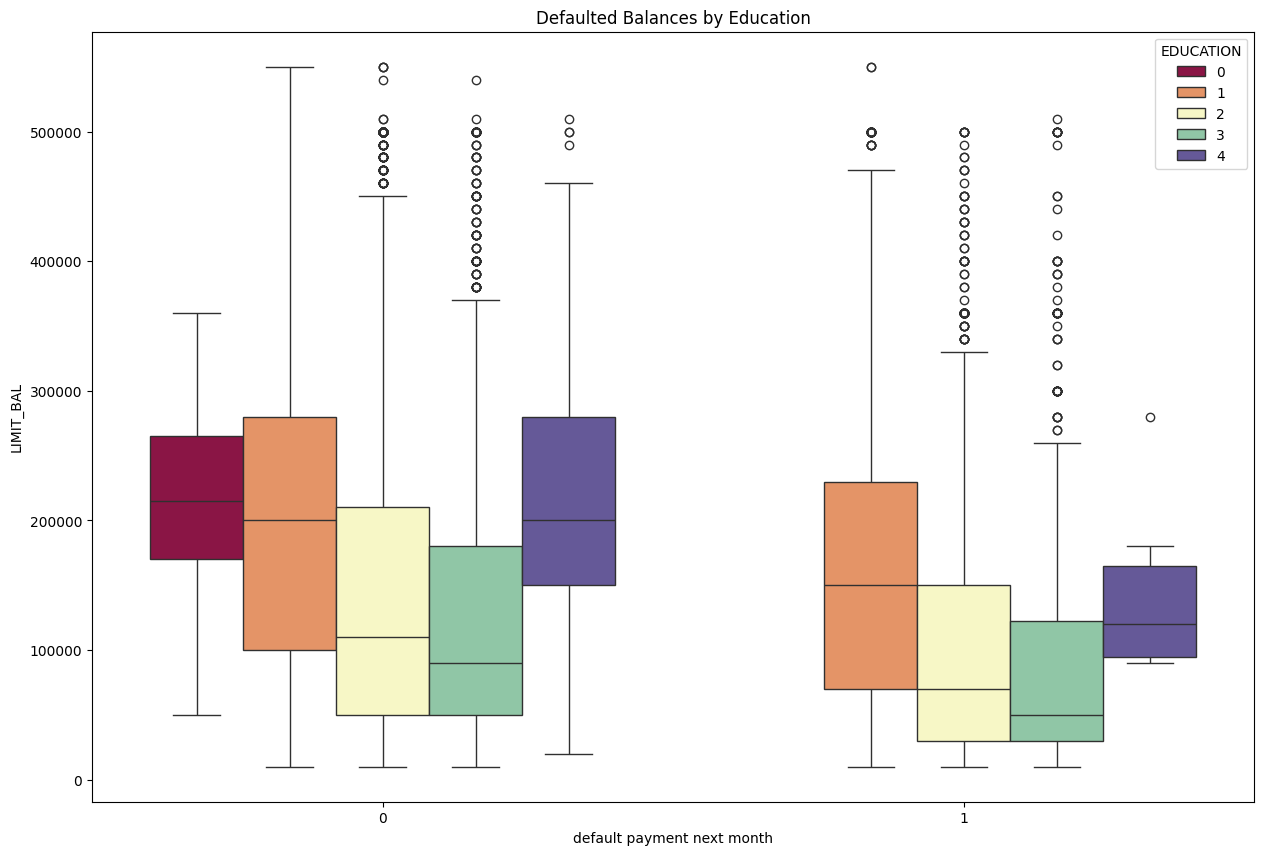

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df_cleaned, x = 'default payment next month', y = 'LIMIT_BAL', hue='EDUCATION', palette = palette)
plt.title('Defaulted Balances by Education')

#### After handling Outliers

By using 3 standard deviations we confirm that 99% of our data points are captured.

# Data Prep

In [44]:
X = df_cleaned.drop(columns='default payment next month', axis= 1)
y = df_cleaned['default payment next month']


x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size= .25, random_state=42)

### SMOTE

Because the class of default dataset is imbalanced dataset, we use Synthetic Minority Over-Sampling Technique (SMOTE) to deal with the imbalanced dataset.

In [45]:
# Initialize SMOTE
smote = SMOTE(random_state=13)

# Apply SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Verify the resampling
print(f"Original training data shape: {x_train.shape}")
print(f"Resampled training data shape: {X_resampled.shape}")

Original training data shape: (21143, 23)
Resampled training data shape: (32794, 23)


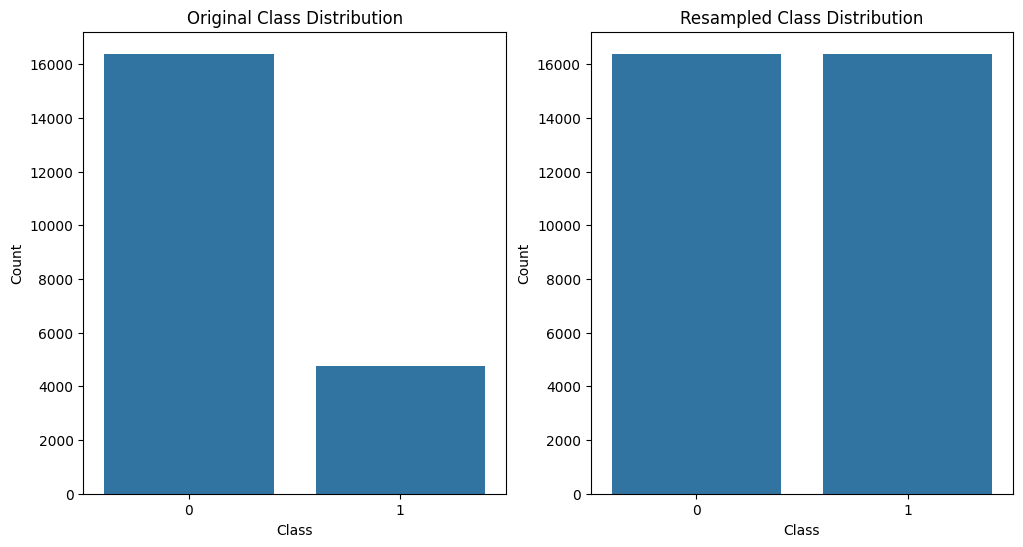

In [20]:
#Sanity Check
# Plot the class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original class distribution
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Resampled class distribution
sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title('Resampled Class Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.show()

# Machine Learning

In [21]:
def metrics(y_test, predictions):
    '''
    This fucntion takes in the testing set and the predictions made by the algorithm and calculates the metrics and
    plots the confusion matrix to evaluate the performance of the classifier.

    '''
    conf_mtrx = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx)
    fig, ax = plt.subplots(figsize=(3, 3))
    disp.plot(cmap='Blues', include_values=True, ax=ax)
    plt.title('Confusion Matrix')
    plt.show();

    print(f'Accuracy: {round(accuracy_score(y_test,predictions),2)}')
    print(f'Precision: {round(precision_score(y_test, predictions),2)}')
    print(f'Recall : {round(recall_score(y_test, predictions),2)}')
    print(f'F1 Score: {round(f1_score(y_test, predictions),2)}')

    # Type I error calculation, since this is the error we want to minimize
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    false_positive_rate = fp / (fp + tn)
    print(f'Positive Rate (Type I Error): {round(false_positive_rate,2)}')

### Histogram-based-Gradient Boosting and XGBoost

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42, shuffle=True)
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size= .25, random_state=42)

def model_deployment(x_train, y_train, x_val_test, y_val_test, x_test, y_test, target_balance=False, standardize=False, dimensionality_reduction=False):
    '''
    This function deploys machine learning models on given datasets. It includes options for data preprocessing steps such as
    target balancing using SMOTE, standardization, and dimensionality reduction using PCA. Two machine learning models
    (XGBoost and Histogram-based Gradient Boosting) are trained, tuned using RandomizedSearchCV, and evaluated on validation and test sets.

    '''

    X_train, Y_train = x_train, y_train
    X_val_test, Y_val_test = x_val_test, y_val_test
    X_test, Y_test = x_test, y_test

    # SMOTE if True
    if target_balance:
        smote = SMOTE(random_state=42)
        X_train, Y_train = smote.fit_resample(X_train, Y_train)

    # Standardize if True
    if standardize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val_test = scaler.transform(X_val_test)
        X_test = scaler.transform(X_test)

    # PCA if True
    if dimensionality_reduction:
        pca = PCA(n_components=4)  # Adjust n_components as needed
        X_train = pca.fit_transform(X_train)
        X_val_test = pca.transform(X_val_test)
        X_test = pca.transform(X_test)

    # ML Models
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    hist_gb = HistGradientBoostingClassifier(random_state=42, early_stopping=True)

    # Hyperparameter Grids
    xgb_param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [10, 20, 30, 40, 50],
        'subsample': [0.7, 0.8, 0.9],
        'alpha': [0.0, 0.1, 0.5],
        'lambda': [0.0, 0.1, 0.5],
        'min_child_weight': [1, 5, 10]
    }

    hist_gb_param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200, 300],
        'max_depth': [10, 20, 30, 40, 50],
        'l2_regularization': [0.0, 0.1, 0.2],
        'min_samples_leaf': [20, 50, 100]
    }

    # Cross-Validations, Randomized Search is faster than Gridsearch
    xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
    hist_gb_random_search = RandomizedSearchCV(estimator=hist_gb, param_distributions=hist_gb_param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

    # Model Fit
    xgb_random_search.fit(X_train, Y_train)
    hist_gb_random_search.fit(X_train, Y_train)

    # Best Models
    best_xgb = xgb_random_search.best_estimator_
    best_hist_gb = hist_gb_random_search.best_estimator_

    # Predictions, Validation
    xgb_val_pred = best_xgb.predict(X_val_test)
    hist_gb_val_pred = best_hist_gb.predict(X_val_test)

    # Predictions, Test
    xgb_test_pred = best_xgb.predict(X_test)
    hist_gb_test_pred = best_hist_gb.predict(X_test)

    # Results
    print("XGBoost Validation Test ")
    print(metrics(Y_val_test, xgb_val_pred))
    print(f'AUC Score: {roc_auc_score(Y_val_test, xgb_val_pred)}')

    print("------------------------------------\n")
    print("Histogram-based Gradient Boosting Validation Test ")
    print(metrics(Y_val_test, hist_gb_val_pred))
    print(f'AUC Score: {roc_auc_score(Y_val_test, hist_gb_val_pred)}')

    print("------------------------------------\n")
    print("XGBoost Test ")
    print(metrics(Y_test, xgb_test_pred))
    print(f'AUC Score: {roc_auc_score(Y_test, xgb_test_pred)}')

    print("------------------------------------\n")
    print("Histogram-based Gradient Boosting Test ")
    print(metrics(Y_test, hist_gb_test_pred))
    print(f'AUC Score: {roc_auc_score(Y_test, hist_gb_test_pred)}')

    print(f'\nBest Parameter XGB: {xgb_random_search.best_params_}, Best Score: {xgb_random_search.best_score_}')
    print(f'Best Parameters HGB: {hist_gb_random_search.best_params_}, Best Score: {hist_gb_random_search.best_score_}')

    return best_xgb, best_hist_gb

XGBoost Validation Test 


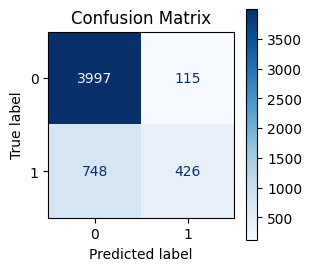

Accuracy: 0.84
Precision: 0.79
Recall : 0.36
F1 Score: 0.5
Positive Rate (Type I Error): 0.03
None
AUC Score: 0.667447542075713
------------------------------------

Histogram-based Gradient Boosting Validation Test 


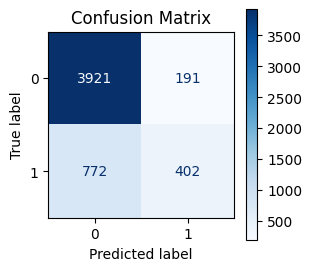

Accuracy: 0.82
Precision: 0.68
Recall : 0.34
F1 Score: 0.46
Positive Rate (Type I Error): 0.05
None
AUC Score: 0.6479848318628653
------------------------------------

XGBoost Test 


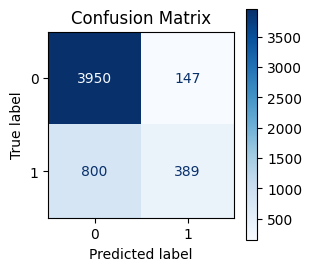

Accuracy: 0.82
Precision: 0.73
Recall : 0.33
F1 Score: 0.45
Positive Rate (Type I Error): 0.04
None
AUC Score: 0.6456428866595653
------------------------------------

Histogram-based Gradient Boosting Test 


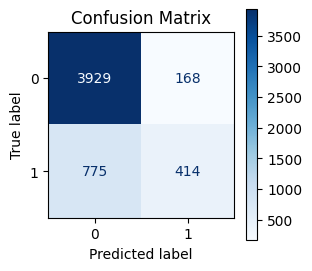

Accuracy: 0.82
Precision: 0.71
Recall : 0.35
F1 Score: 0.47
Positive Rate (Type I Error): 0.04
None
AUC Score: 0.653593071957922

Best Parameter XGB: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 20, 'learning_rate': 0.01, 'lambda': 0.0, 'alpha': 0.1}, Best Score: 0.8155888643825924
Best Parameters HGB: {'min_samples_leaf': 20, 'max_iter': 300, 'max_depth': 40, 'learning_rate': 0.01, 'l2_regularization': 0.0}, Best Score: 0.8161564191744481


In [23]:
best_xgb, best_hist_gb = model_deployment(x_train, y_train, X_val_test, y_val_test,
                                        x_test, y_test, target_balance=False, standardize=True, dimensionality_reduction=False)

### LightGBM model

In [39]:
# Define a range of values for the hyperparameters to search through
lgbm_param_grid = {
    'num_leaves': [5, 20, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 400],
    'metric': ['auc']
}

In [40]:
# Initialize an empty dictionary to store the best hyperparameters and their values
best_hyperparameters = {}
best_values = {}

# Initialize the LightGBM classifier
# other boosting types: ‘gbdt’ traditional Gradient Boosting Decision Tree.
# ‘dart’Dropouts meet Multiple Additive Regression Trees. ‘rf’ Random Forest
lgb_classifier = lgb.LGBMClassifier(objective='binary', boosting_type='dart', verbose = -1)

# Initialize GridSearchCV for hyperparameters
lgb_grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=lgbm_param_grid,
                           scoring='accuracy', cv=5)

# Fit the model to the training data to search for the best hyperparameters
lgb_grid_search.fit(x_train, y_train)

# Get the best hyperparameters and their values
best_params = lgb_grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())

# Creating lgbm datasets for training
train_data = lgb.Dataset(x_train, label=y_train)
validation_data = lgb.Dataset(X_val_train, label=y_val_train)

# Train the LightGBM model
bst = lgb.train(best_params, train_data, num_round=10, valid_sets=validation_data, callbacks=[lgb.early_stopping(stopping_rounds=5)])

# Prediction of LightGBM model
ypred = bst.predict(x_test)
ypred_val = bst.predict(X_val_test)


LGBM model using grid searchCV validation test


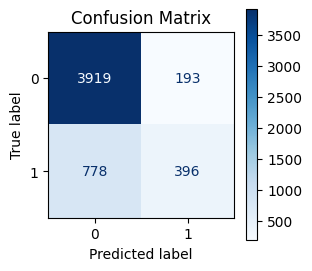

Accuracy: 0.82
Precision: 0.67
Recall : 0.34
F1 Score: 0.45
Positive Rate (Type I Error): 0.05
ROC AUC Score: 0.80


LGBM model using grid searchCV on test set


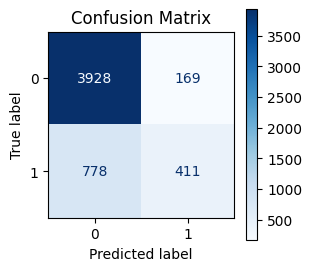

Accuracy: 0.82
Precision: 0.71
Recall : 0.35
F1 Score: 0.46
Positive Rate (Type I Error): 0.04
ROC AUC Score: 0.79


In [52]:
y_val_pred_class = np.where(ypred_val > 0.5, 1, 0)
# metrics on the validation set
print("LGBM model using GridSearchCV on validation st")
metrics(y_val_test, y_val_pred_class)
roc_auc = roc_auc_score(y_val_test, ypred_val)
print(f"ROC AUC Score: {roc_auc:.2f}")


# using custom metrics function on a base model and hypertunned model
print("\n\nLGBM model using GridSearchCV on test set")
y_pred_class = np.where(ypred > 0.5, 1, 0)
metrics(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, ypred)
print(f"ROC AUC Score: {roc_auc:.2f}")

In [ ]:
lgbm_random_search = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=lgbm_param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Fitting data
lgbm_random_search.fit(x_train, y_train)
best_lgbm = lgbm_random_search.best_estimator_
print(best_lgbm)
# predictions, val and test
lgbm_val_pred = best_lgbm.predict(X_val_test)
lgbm_test_pred = best_lgbm.predict(x_test)
# y_val_pred = best_model.predict(X_val_test, num_iteration=bst.best_iteration)

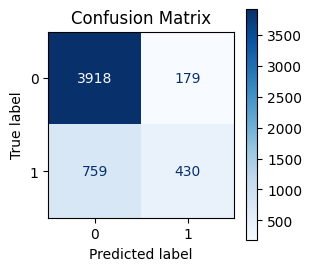

Accuracy: 0.82
Precision: 0.71
Recall : 0.36
F1 Score: 0.48
Positive Rate (Type I Error): 0.04
ROC AUC Score: 0.66


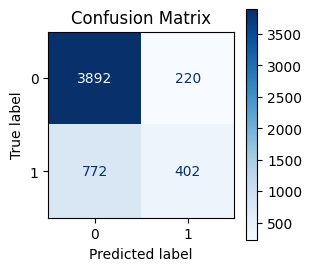

Accuracy: 0.81
Precision: 0.65
Recall : 0.34
F1 Score: 0.45
Positive Rate (Type I Error): 0.05
ROC AUC Score: 0.64


In [33]:
# metrics on the validation set
print("LGVM model validation test")
metrics(y_val_test, lgbm_val_pred)
roc_auc = roc_auc_score(y_val_test, lgbm_val_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")


# using custom metrics function on a base model and hypertunned model
print("")
metrics(y_test, lgbm_test_pred)
roc_auc = roc_auc_score(y_test, lgbm_test_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

In [34]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))


# print the scores on training and test set
print('\nTraining set score on validation set: {:.4f}'.format(clf.score(X_val_train, y_val_train)))

print('Test set score on validation set: {:.4f}'.format(clf.score(X_val_test, y_val_test)))

Training set score: 0.8413
Test set score: 0.8226

Training set score on validation set: 0.8432
Test set score on validation set: 0.8356


Since they are similar values for both datasets, we cannot say there is overfitting. The best model (hypertunned) scores slightly higher than the base model so minor optimization was complete.

### Random Forest Model

In [35]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4097
           1       0.54      0.49      0.51      1189

    accuracy                           0.79      5286
   macro avg       0.70      0.68      0.69      5286
weighted avg       0.79      0.79      0.79      5286



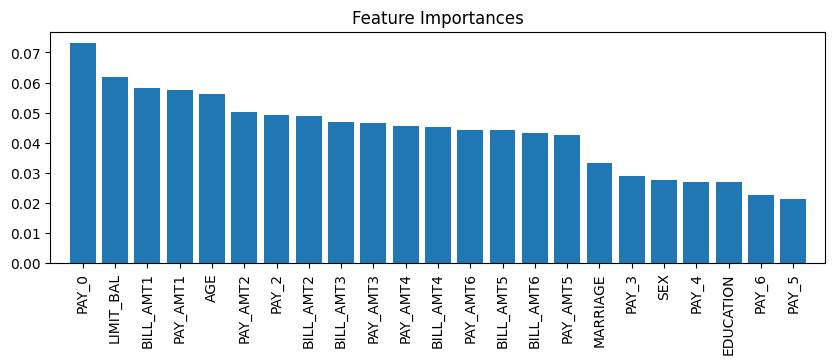

In [36]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 3))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

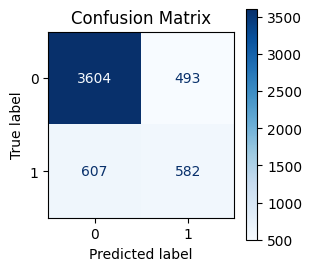

Accuracy: 0.79
Precision: 0.54
Recall : 0.49
F1 Score: 0.51
Positive Rate (Type I Error): 0.12
ROC AUC Score: 0.68


In [38]:
# Plot the confusion matrix
metrics(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Conclusion


We tested the data on a LightGBM mode


This function deploys machine learning models on given datasets. It includes options for data preprocessing steps such as
    target balancing using SMOTE, standardization, and dimensionality reduction using PCA. Two machine learning models
    (XGBoost and Histogram-based Gradient Boosting) are trained, tuned using RandomizedSearchCV, and evaluated on validation and test sets.


Xgboost Test

Accuracy: 0.82  
Precision: 0.73  
Recall : 0.33  
F1 Score: 0.45  
Positive Rate (Type I Error): 0.04  
None
AUC Score: 0.6456428866595653  


Histogram-based Gradient Boosting Test
Accuracy: 0.82   
Precision: 0.71  
Recall : 0.35  
F1 Score: 0.47  
Positive Rate (Type I Error): 0.04  
AUC Score: 0.653593071957922  
Score: 81.6  


LightGBM Test
Accuracy: 0.82  
Precision: 0.71  
Recall : 0.36  
F1 Score: 0.48  
Positive Rate (Type I Error): 0.04  
ROC AUC Score: 0.66  


Random Forest Test
Accuracy: 0.79  
Precision: 0.54  
Recall : 0.49  
F1 Score: 0.51  
Positive Rate (Type I Error): 0.12  
ROC AUC Score: 0.68  

# Appendix

## Code

## References

- Yeh, I., & Lien, C. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Syst. Appl., 36, 2473-2480.

- Subasi, A., & Cankurt, S. (2019). Prediction of default payment of credit card clients using Data Mining Techniques. 2019 International Engineering Conference (IEC), 115-120.